In [147]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import json
import urllib.request
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [148]:
api_key=""

In [149]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Apple&'
       'from=2021-09-15&'
       'sortBy=popularity&'
       'apiKey='+api_key)

with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())

In [150]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [151]:
for row in data['articles']:
    print(row['content'])

    #print(row['content'])
    tweet_list.append(row['content'])
    analysis = TextBlob(row['content'])
    score = SentimentIntensityAnalyzer().polarity_scores(row['content'])
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(row['content'])
        negative += 1
    elif pos > neg:
        positive_list.append(row['content'])
        positive += 1

    elif pos == neg:
        neutral_list.append(row['content'])
        neutral += 1
       

Truecaller, which operates an eponymous caller-identification service, said on Wednesday it is looking to raise $116 million in an initial public offering on Nasdaq Stockholm.
The 12-year-old Stockh… [+2721 chars]
By Reuters Staff
TOKYO, Sept 15 (Reuters) - Japanese shares on Wednesday retreated from three-decade peaks hit in the previous session, as investors took profits after a strong rally over the last t… [+1760 chars]
Hoy es el gran día de Xiaomi. Si ayer Apple fue la principal protagonista al presentar los iPhone 13 y 13 Pro, hoy la firma china contraataca con el lanzamiento de sus nuevos Xiaomi 11T.  Y no, no se… [+1469 chars]
Dienstebekanntgabe bei der gestrigen Keynote: Neben der Vorstellung von iPhone 13 und 13 Pro, neuen iPads sowie der Apple Watch Series 7 hat Apple auch eine Ausdehnung seines Sportangebots Fitness+ a… [+2004 chars]
Apple hat auf seinen jährlichen September-Event wie gewohnt zahlreiche Neuigkeiten präsentiert, die in den nächsten Wochen und Monaten auf den

In [152]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  20
positive number:  6
negative number:  8
neutral number:  6


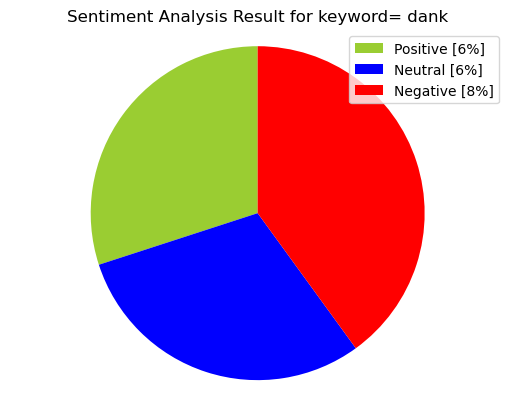

In [153]:
#Creating PieCart
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"""""" )
plt.axis("equal")
plt.show()

In [163]:
tweet_list.drop_duplicates(inplace = True)

In [168]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list['text'] = pd.DataFrame(tweet_list)
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"Truecaller, which operates an eponymous caller...","Truecaller, which operates an eponymous caller...",0.000000,0.033333,neutral,0.0,1.0,0.0,0.0
1,"By Reuters Staff\r\nTOKYO, Sept 15 (Reuters) -...","By Reuters Staff\r\nTOKYO, Sept 15 (Reuters) -...",0.066667,0.241667,positive,NaN,NaN,NaN,NaN
2,Hoy es el gran día de Xiaomi. Si ayer Apple fu...,Hoy es el gran día de Xiaomi. Si ayer Apple fu...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
3,Dienstebekanntgabe bei der gestrigen Keynote: ...,Dienstebekanntgabe bei der gestrigen Keynote: ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
4,Apple hat auf seinen jährlichen September-Even...,Apple hat auf seinen jährlichen September-Even...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
5,"Die getesteten Docks, Hubs, Tastaturen, Hüllen...","Die getesteten Docks, Hubs, Tastaturen, Hüllen...",0.000000,0.000000,negative,NaN,NaN,NaN,NaN
6,Das Hackerkollektiv Anonymous hat eigenen Anga...,Das Hackerkollektiv Anonymous hat eigenen Anga...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
7,Eine im Auftrag von Microsoft durchgeführte St...,Eine im Auftrag von Microsoft durchgeführte St...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
8,Apple finally announced Apple Watch Series 7 o...,Apple finally announced Apple Watch Series 7 o...,0.000000,0.333333,neutral,0.0,1.0,0.0,0.0
9,"After months of rumors, Apple today held its h...","After months of rumors, Apple today held its h...",0.000000,0.000000,positive,NaN,NaN,NaN,NaN


In [169]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [170]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [171]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,8,40.0
positive,6,30.0
neutral,6,30.0


In [172]:
#Function to Create Wordcloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


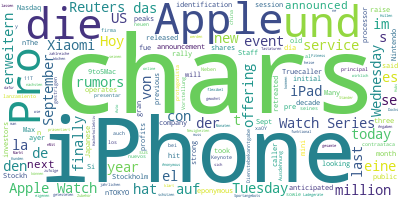

Creating wordcloud for positive sentiment
Word Cloud Saved Successfully


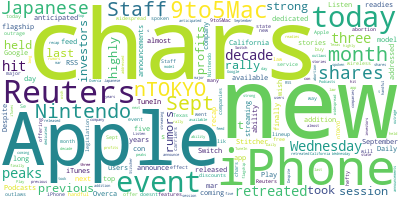

Word Cloud Saved Successfully


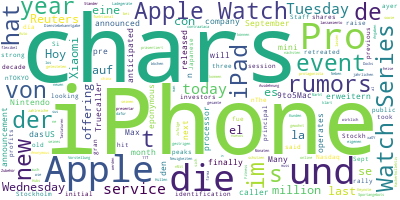

Creating wordcloud for negitive sentiment
Word Cloud Saved Successfully


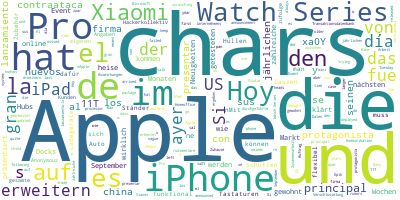

In [173]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)
print('Creating wordcloud for positive sentiment')
create_wordcloud(tw_list_positive["text"].values)
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)
print('Creating wordcloud for negitive sentiment')
create_wordcloud(tw_list_negative["text"].values)

In [174]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized,nonstop,stemmed
0,"Truecaller, which operates an eponymous caller...","Truecaller, which operates an eponymous caller...",0.000000,0.033333,neutral,0.0,1.0,0.0,0.0,Truecaller which operates an eponymous calleri...,"[truecaller, which, operates, an, eponymous, c...","[truecaller, operates, eponymous, calleridenti...","[truecal, oper, eponym, calleridentif, servic,..."
1,"By Reuters Staff\r\nTOKYO, Sept 15 (Reuters) -...","By Reuters Staff\r\nTOKYO, Sept 15 (Reuters) -...",0.066667,0.241667,positive,NaN,NaN,NaN,NaN,By Reuters Staff\r\nTOKYO Sept 15 Reuters Jap...,"[by, reuters, staff, tokyo, sept, 15, reuters,...","[reuters, staff, tokyo, sept, 15, reuters, jap...","[reuter, staff, tokyo, sept, 15, reuter, japan..."
2,Hoy es el gran día de Xiaomi. Si ayer Apple fu...,Hoy es el gran día de Xiaomi. Si ayer Apple fu...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN,Hoy es el gran día de Xiaomi Si ayer Apple fue...,"[hoy, es, el, gran, día, de, xiaomi, si, ayer,...","[hoy, es, el, gran, día, de, xiaomi, si, ayer,...","[hoy, es, el, gran, día, de, xiaomi, si, ayer,..."
3,Dienstebekanntgabe bei der gestrigen Keynote: ...,Dienstebekanntgabe bei der gestrigen Keynote: ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0,Dienstebekanntgabe bei der gestrigen Keynote N...,"[dienstebekanntgabe, bei, der, gestrigen, keyn...","[dienstebekanntgabe, bei, der, gestrigen, keyn...","[dienstebekanntgab, bei, der, gestrigen, keyno..."
4,Apple hat auf seinen jährlichen September-Even...,Apple hat auf seinen jährlichen September-Even...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN,Apple hat auf seinen jährlichen SeptemberEvent...,"[apple, hat, auf, seinen, jährlichen, septembe...","[apple, hat, auf, seinen, jährlichen, septembe...","[appl, hat, auf, seinen, jährlichen, september..."


In [175]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

20 Number of reviews has 312 words


,aapl,aber,abil,abort,addit,address,ahead,al,almost,also,...,xiaomi,year,yearold,zahlreich,zubehör,zufolg,zuhaus,zusammenarbeit,zwar,zwischen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [176]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
appl,19
iphon,18
pro,8
und,7
die,6
watch,6
seri,6
new,5
announc,5
der,5


In [177]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('iphone 13', 15),
 ('13 pro', 7),
 ('apple watch', 6),
 ('watch series', 6),
 ('13 iphone', 3),
 ('september event', 2),
 ('apple today', 2),
 ('13 mini', 2),
 ('mini iphone', 2),
 ('pro iphone', 2),
 ('pro max', 2),
 ('truecaller operates', 1),
 ('operates eponymous', 1),
 ('eponymous caller', 1),
 ('caller identification', 1),
 ('identification service', 1),
 ('service said', 1),
 ('said wednesday', 1),
 ('wednesday looking', 1),
 ('looking raise', 1)]